## Descrição do Problema
Uma corporação multinacional está enfrentando desafios com a rotatividade de funcionários, e a equipe de Recursos Humanos precisa de um modelo preditivo para identificar quais funcionários têm maior probabilidade de deixar a empresa (churn ou turnover). O objetivo é permitir decisões estratégicas que reduzam a rotatividade, aumentando a retenção e satisfação dos funcionários.

## Objetivo
Nesta fase inicial, o foco é explorar o conjunto de dados fornecido, entender suas variáveis, identificar padrões e realizar a limpeza necessária para preparar os dados para o treinamento de modelos preditivos. O objetivo final é treinar e avaliar modelos como Regressão Logística, Random Forest e um modelo de Deep Learning para prever a rotatividade.

## Conjunto de Dados
O conjunto de dados contém informações extensas sobre os funcionários, incluindo:
- `JobInvolvement` (envolvimento no trabalho)
- `Education` (nível de educação)
- `JobSatisfaction` (satisfação no trabalho)
- `PerformanceRating` (avaliação de desempenho)
- `RelationshipSatisfaction` (satisfação no relacionamento)
- `WorkLifeBalance` (equilíbrio entre vida pessoal e profissional)

A fonte do conjunto de dados é o Kaggle: [HR Analytics: Attrition Dataset](https://www.kaggle.com/pavansubhashht/hr-analytics-attrition-dataset).

In [593]:
from cProfile import label

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from keras.src.layers import average
from tensorboard.notebook import display

In [594]:
employee_df = pd.read_csv('../data/raw/Human_Resources.csv')
from IPython.display import display
display(employee_df)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [595]:
# A idade deve ter um impacto na tendência de ficar ou sair
# A distância de casa deve ter um impacto na tendência de ficar ou sair
# O estado civil deve ter um impacto na tendência de sair se você for solteiro
# A renda mensal deve ter um impacto na tendência de ficar se os funcionários estiverem sendo bem pagos
# O número de empresas trabalhadas deve ter um impacto na tendência de sair se o número for alto
# A avaliação de desempenho deve ter um impacto na tendência de sair se estiver recebendo melhores ofertas
# A satisfação deve ter um impacto na tendência de ficar se estiver bem satisfeito
# O nível de opção de ações deve ter um impacto na tendência de ficar se as ações estiverem bloqueadas por um certo tempo


In [596]:
display(employee_df.head(5))
employee_df.tail(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [597]:
employee_df.info()
# temos 26 colunas int64 e 9 colunas object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [598]:
employee_df.describe()
# A idade média é 36.9

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [599]:
"""Explorando o dataset"""

# Substituindo Sim e Não por 1 e 0 --> Attrition, Over18 e OverTime.
# print(pd.options.display.max_columns) 20 colunas no máximo
pd.set_option('display.max_columns', None)
employee_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [600]:
# Substituindo Sim e Não por 1 e 0 --> Attrition, Over18 e OverTime.

""" employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x:1 if x == 'Yes' else 0)
employee_df.head(10) 
"""
print(employee_df['Attrition'].unique())

['Yes' 'No']


In [601]:
employee_df = pd.read_csv('../data/raw/Human_Resources.csv')

""" Analisando o atributo Attrition """

# Primeiro, vou verificar os valores únicos em Attrition
print("Valores únicos em 'Attrition' após recarregar:")
print(employee_df['Attrition'].unique())

# Agora aplicando a função lambda com .str.strip().str.upper() para garantir que nenhum erro ocorra
employee_df['Attrition'] = employee_df['Attrition'].str.strip().str.upper().apply(lambda x: 1 if x == 'YES' else 0)

# Verificando os resultados
print("Valores únicos após a lambda:")
print(employee_df['Attrition'].unique())

print("Contagem após a lambda:")
print(employee_df['Attrition'].value_counts())
employee_df.head(5)

Valores únicos em 'Attrition' após recarregar:
['Yes' 'No']
Valores únicos após a lambda:
[1 0]
Contagem após a lambda:
Attrition
0    1233
1     237
Name: count, dtype: int64


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [602]:
employee_df = pd.read_csv('../data/raw/Human_Resources.csv')


# Agora para as colunas Over18 e OverTime:

employee_df['Over18'] = employee_df['Over18'].str.strip().str.upper().apply(lambda x: 1 if x == 'Y' else 0)
# pd.set_option('display.max_columns', None)
print("--Over18--")
display(employee_df['Over18'].unique())
display(employee_df['Over18'].value_counts())

# OverTime
employee_df['OverTime'] = employee_df['OverTime'].str.strip().apply(lambda x: 1 if x == 'Yes' else 0)
print("--OverTime--")
display(employee_df['OverTime'].unique())
display(employee_df['OverTime'].value_counts())

--Over18--


array([1])

Over18
1    1470
Name: count, dtype: int64

--OverTime--


array([1, 0])

OverTime
0    1054
1     416
Name: count, dtype: int64

### Gerando alguns gráficos para uma análise inicial

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

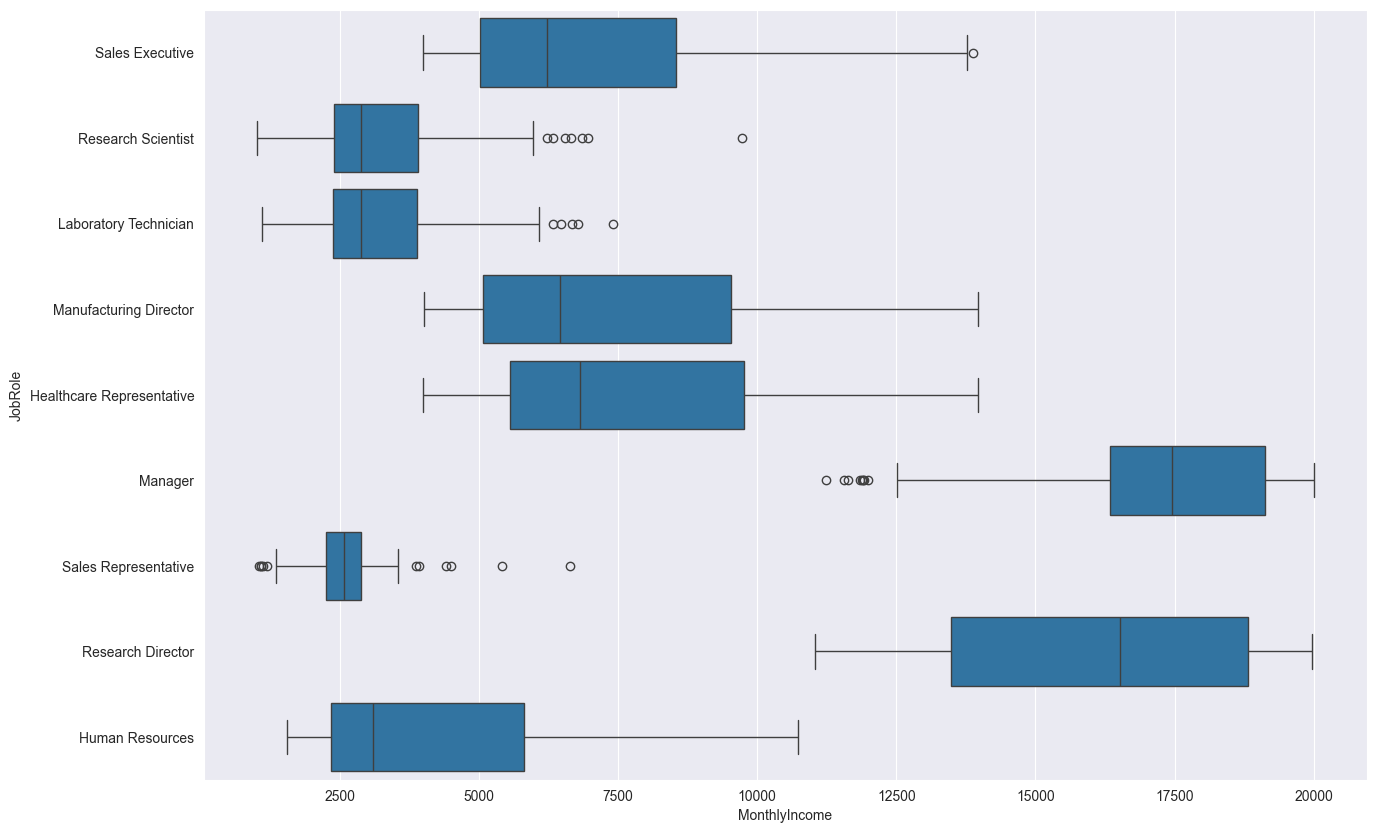

In [603]:

plt.figure(figsize=(15,10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = employee_df)

# Os cargos com os menores salários são Cientista de Pesquisa, Técnico de Laboratório, RH e Representante de Vendas.
# Os cargos com os maiores salários são Gerente e Diretor de Pesquisa. Salários de faixa média são encontrados nas posições de Executivo de Vendas, Diretor de Manufatura e Representante de Saúde.

<Axes: >

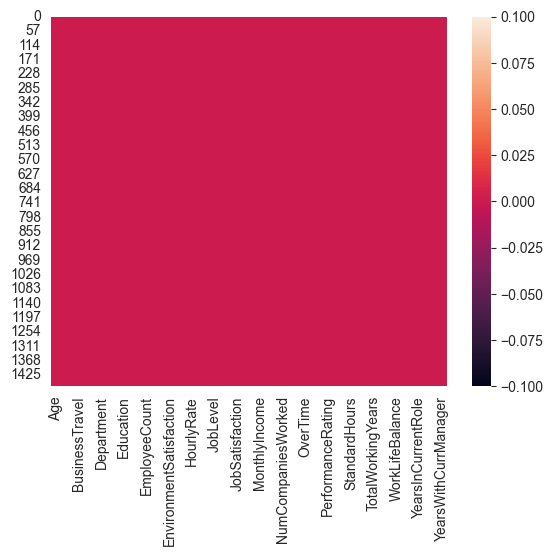

In [604]:
""" Verificando dados ausentes """

employee_df = pd.read_csv('../data/raw/Human_Resources.csv')
sns.heatmap(employee_df.isnull())

In [605]:
# Transformando dados categoricos binarios agora:

employee_df['Over18'] = employee_df['Over18'].str.strip().str.upper().apply(lambda x: 1 if x == 'Y' else 0)
employee_df['OverTime'] = employee_df['OverTime'].str.strip().apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['Attrition'] = employee_df['Attrition'].str.strip().str.upper().apply(lambda x: 1 if x == 'YES' else 0)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>],
       [<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>],
       [<Axes: title={'center': 'Over18'}>,
        <Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'Relations

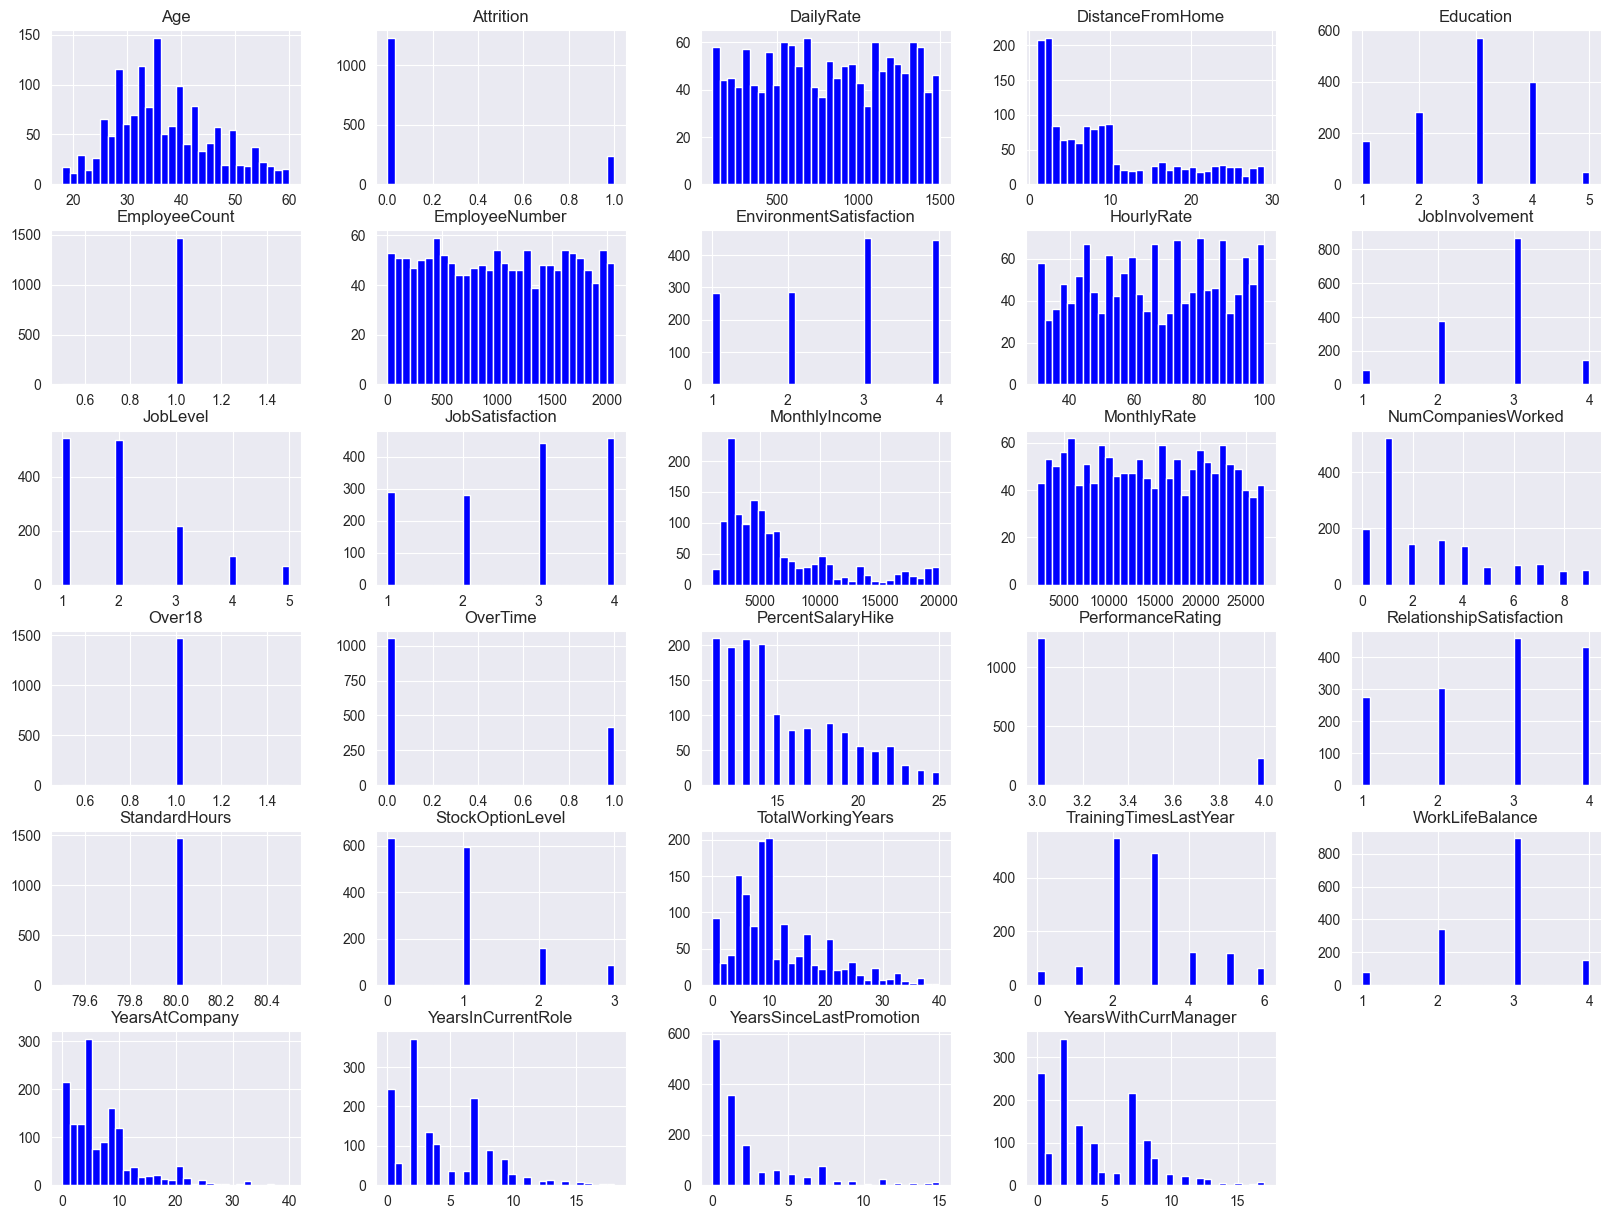

In [606]:
# Vou gerar gráficos que fornecem uma visão geral de cada atributo numérico e da variável alvo no conjunto de dados.

employee_df.hist(bins=30, figsize=(20, 15), color = 'b')

In [607]:
# Calculando o salário médio:
employee_df = pd.read_csv('../data/raw/Human_Resources.csv')
average_salary = employee_df[employee_df['Attrition'] == 'Yes']['MonthlyIncome'].mean()
print(f'Average month salary of workers that turnover is: {average_salary}')

average_salary = employee_df[employee_df['Attrition'] == 'No']['MonthlyIncome'].mean()
print(f'Average month salary of workers that stay is: {average_salary}')

average_salary = employee_df['MonthlyIncome'].mean() # General mean of all workers
print(f'Average month salary of all workers is: {average_salary}')

Average month salary of workers that turnover is: 4787.0928270042195
Average month salary of workers that stay is: 6832.739659367397
Average month salary of all workers is: 6502.931292517007


In [608]:
# Removendo EmployeeCount, EmployeeNumber, Over18 e StandardHours porque todos são constantes

employee_df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True) # changing the data frame in memory


In [609]:
employee_df.shape

(1470, 31)

In [610]:
# converter as colunas categóricas em valores numéricos

"""
BusinessTravel: Nível de viagem de negócios do funcionário (Baixo, Médio, Alto).
Department: Departamento em que o funcionário trabalha (Vendas, Pesquisa e Desenvolvimento, RH).
EducationField: Área de educação do funcionário (Ciências da Vida, Marketing, Medicina, etc.).
Gender: Gênero do funcionário (Masculino, Feminino).
JobRole: Cargo do funcionário (Gerente, Representante de Vendas, Técnico de Laboratório, etc.).
MaritalStatus: Estado civil do funcionário (Solteiro, Casado, Divorciado).
"""

# Usando o Onehotencoder
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder(handle_unknown='ignore', dtype='int32')

In [611]:
'''Fazendo os fit das 6 clunas categoticas dps da conversão'''

'Fazendo os fit das 6 clunas categoticas dps da conversão'

In [612]:
# Fazendo fit com a coluna BusinessTravel dps transformo em um dataframe e entao uso concat para adicionar a employeedf

one = one.fit(employee_df[['BusinessTravel']])
one.transform(employee_df[['BusinessTravel']]).toarray()

one_df = pd.DataFrame(one.transform(employee_df[['BusinessTravel']]).toarray(),columns=one.get_feature_names_out())

employee_df = pd.concat([employee_df, one_df], axis=1)
one_df.head(5)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [613]:
one = one.fit(employee_df[['Department']])
one.transform(employee_df[['Department']]).toarray()

one_df = pd.DataFrame(one.transform(employee_df[['Department']]).toarray(), columns=one.get_feature_names_out())

employee_df = pd.concat([employee_df, one_df], axis=1)
one_df.head(5)


,Department_Human Resources,Department_Research & Development,Department_Sales
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [614]:
"""Agora em vez de fazer de 1 em 1 vou usar um for pra iterar cada coluna e aplicar o OneHot para cada um e dps junto os dados transformados no employee_df"""

for col in ['EducationField', 'Gender', 'JobRole', 'MaritalStatus']:
    one = one.fit(employee_df[[col]])
    one.transform(employee_df[[col]]).toarray()

    one_df = pd.DataFrame(one.transform(employee_df[[col]]).toarray(), columns=one.get_feature_names_out())

    employee_df = pd.concat([employee_df, one_df], axis=1)

one_df.head(5)

,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0


In [615]:
print(employee_df.columns)


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationF

In [616]:
"""
# Para confirmar que funcionou a transformação e o concat

employee_df.filter(like='EducationField').head(5)
employee_df.filter(like='Gender').head(5)
employee_df.filter(like='JobRole').head(5)
employee_df.filter(like='MaritalStatus').head(5)

"""


"\n# Para confirmar que funcionou a transformação e o concat\n\nemployee_df.filter(like='EducationField').head(5)\nemployee_df.filter(like='Gender').head(5)\nemployee_df.filter(like='JobRole').head(5)\nemployee_df.filter(like='MaritalStatus').head(5)\n\n"

In [617]:
# Apagando as colunas categóricas originais já tratadas.

employee_df = employee_df.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'], axis=1)

In [618]:
# Criando 2 Dataframes para separar os funcionarios que sairam:
# employee_df = pd.read_csv('../data/raw/Human_Resources.csv')
employee_df['Attrition'] = employee_df['Attrition'].str.strip().str.upper().apply(lambda x: 1 if x == 'YES' else 0)
employee_df['OverTime'] = employee_df['OverTime'].str.strip().apply(lambda x: 1 if x == 'Yes' else 0)

left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

print(f'Number of employees who left: {len(left_df)}')
print(f'Number of employees who stayed: {len(stayed_df)}')

Number of employees who left: 237
Number of employees who stayed: 1233


In [619]:

print(f'Total number of employees: {len(employee_df)}')
print(f'Number of employees who left: {len(left_df)}')
print(f'Number of employees who stayed: {len(stayed_df)}')

print(f'% of employees who left = {1. * len(left_df) / len(employee_df) * 100:.2f}%')
print(f'% of employees who have stayed = {1. * len(stayed_df) / len(employee_df) * 100:.2f}%')

Total number of employees: 1470
Number of employees who left: 237
Number of employees who stayed: 1233
% of employees who left = 16.12%
% of employees who have stayed = 83.88%


In [620]:
# Descrição dos que ficaram
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397,0.111922,0.168694,0.719384,0.041363,0.671533,0.287105,0.016221,0.419303,0.100568,0.325223,0.057583,0.081103,0.406326,0.593674,0.098946,0.032441,0.159773,0.078670,0.109489,0.063260,0.198702,0.218167,0.040552,0.238443,0.477697,0.283861
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116,0.315399,0.374634,0.449483,0.199208,0.469846,0.452594,0.126374,0.493645,0.300878,0.468648,0.233048,0.273104,0.491346,0.491346,0.298710,0.177241,0.366544,0.269332,0.312379,0.243529,0.399185,0.413169,0.197329,0.426304,0.499705,0.451053
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [621]:
# Descrição dos que saíram
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321,0.050633,0.291139,0.658228,0.050633,0.561181,0.388186,0.029536,0.375527,0.147679,0.265823,0.046414,0.135021,0.367089,0.632911,0.037975,0.050633,0.261603,0.021097,0.042194,0.008439,0.198312,0.240506,0.139241,0.139241,0.354430,0.506329
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349,0.219711,0.455249,0.475307,0.219711,0.497293,0.488369,0.169661,0.485284,0.355533,0.442705,0.210824,0.342469,0.483031,0.483031,0.191540,0.219711,0.440438,0.144012,0.201457,0.091668,0.399572,0.428295,0.346930,0.346930,0.479353,0.501018
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,39.000000,1.0,1092.000000,17.0000

In [622]:
# Vou verificar  se ainda existem valores categóricos em employee

employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  MonthlyRate                        1470 non-null   int64
 12  NumCompaniesWorked  

<Axes: >

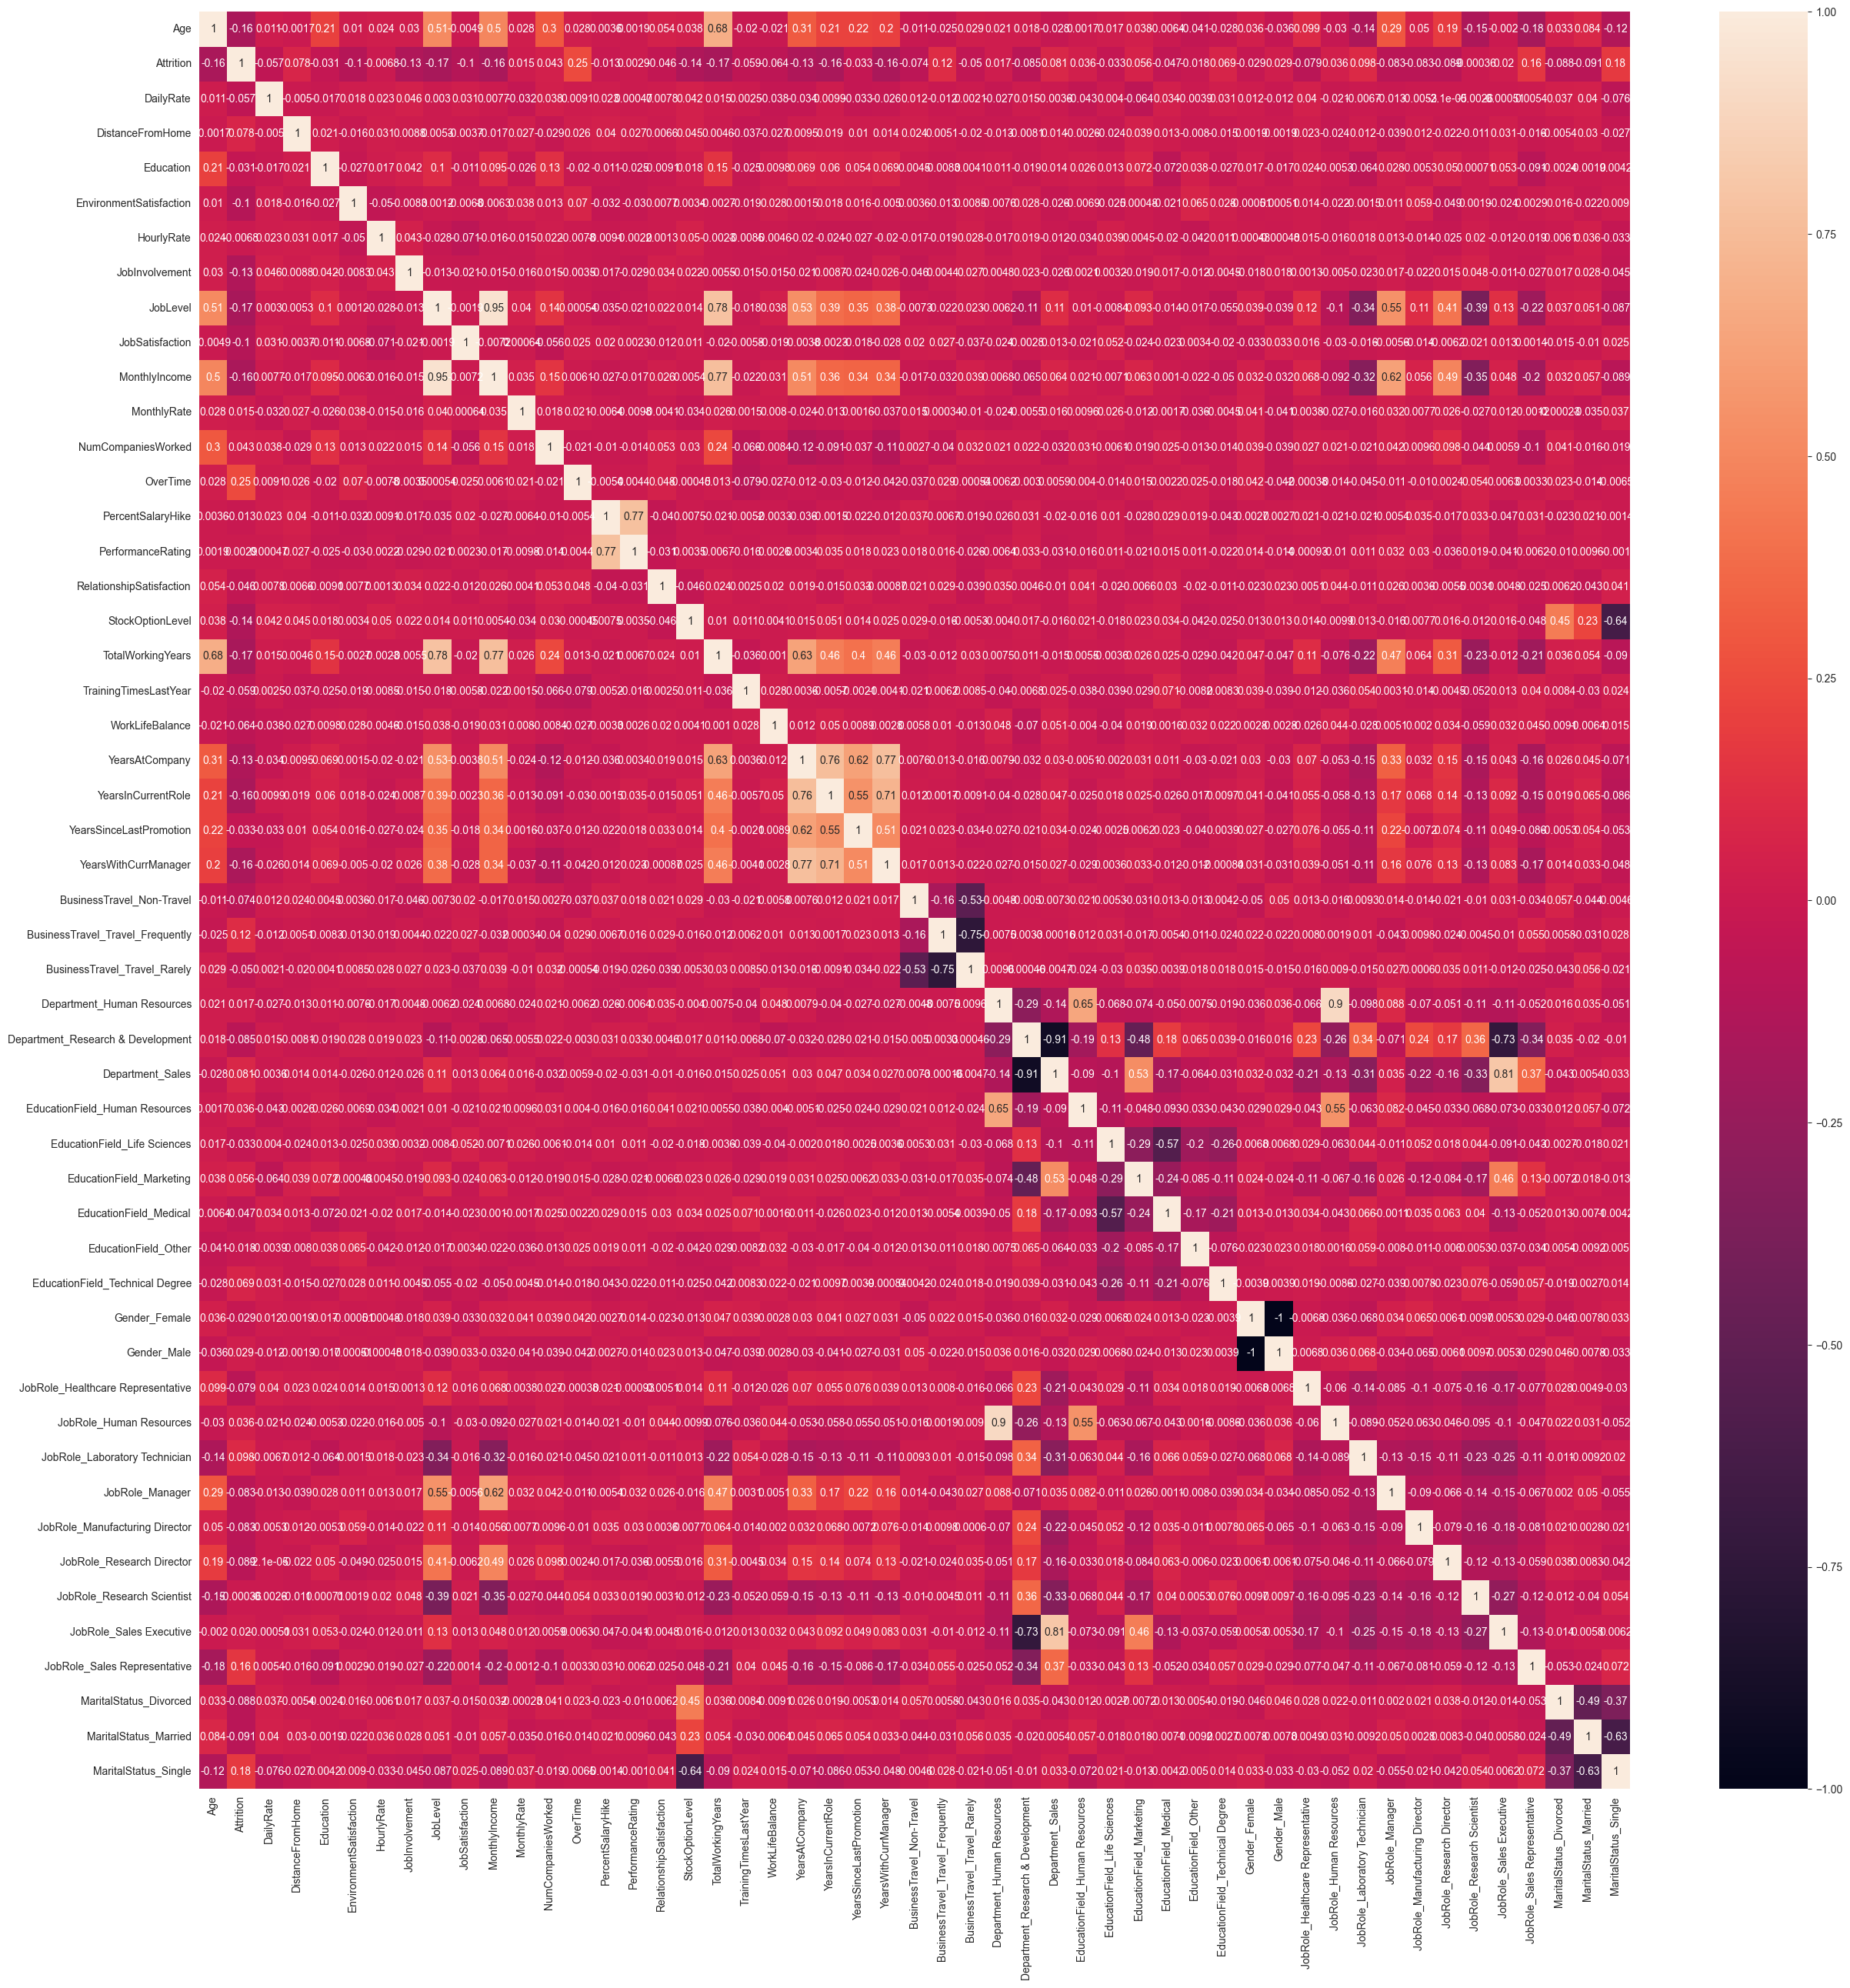

In [623]:
# Verificando as correlações:

correlacoes = employee_df.corr()
fig, ax = plt.subplots(figsize = (30, 30))
sns.heatmap(correlacoes, annot=True)

In [624]:
"""Calculando as correlações com o atributo alvo 'Attrition'"""

correlations = employee_df.drop(columns=['Attrition']).apply(lambda x: x.corr(employee_df['Attrition']))

# Obtendo as top 15 maiores correlações
best_correlations = correlations.abs().nlargest(15)

print(best_correlations)

best_correlations = best_correlations.index.tolist() #pegando os nomes das respectivas melhores colunas
print(best_correlations)

OverTime                            0.246118
MaritalStatus_Single                0.175419
TotalWorkingYears                   0.171063
JobLevel                            0.169105
YearsInCurrentRole                  0.160545
MonthlyIncome                       0.159840
Age                                 0.159205
JobRole_Sales Representative        0.157234
YearsWithCurrManager                0.156199
StockOptionLevel                    0.137145
YearsAtCompany                      0.134392
JobInvolvement                      0.130016
BusinessTravel_Travel_Frequently    0.115143
JobSatisfaction                     0.103481
EnvironmentSatisfaction             0.103369
dtype: float64
['OverTime', 'MaritalStatus_Single', 'TotalWorkingYears', 'JobLevel', 'YearsInCurrentRole', 'MonthlyIncome', 'Age', 'JobRole_Sales Representative', 'YearsWithCurrManager', 'StockOptionLevel', 'YearsAtCompany', 'JobInvolvement', 'BusinessTravel_Travel_Frequently', 'JobSatisfaction', 'EnvironmentSatisfaction']


### 🔹 **Principais Correlações com a variável-alvo:**
1. **OverTime** → 0.25
2. **MaritalStatus_Single** → 0.18
3. **TotalWorkingYears** → 0.17
4. **JobLevel** → 0.17
5. **YearsInCurrentRole** → 0.16
6. **MonthlyIncome** → 0.16
7. **Age** → 0.16
8. **JobRole_Sales Representative** → 0.16
9. **YearsWithCurrManager** → 0.16
10. **StockOptionLevel** → 0.14
11. **YearsAtCompany** → 0.13
12. **JobInvolvement** → 0.13
13. **BusinessTravel_Travel_Frequently** → 0.12
14. **JobSatisfaction** → 0.10
15. **EnvironmentSatisfaction** → 0.10

### 📌 **Principais variáveis identificadas:**
`['OverTime', 'MaritalStatus_Single', 'TotalWorkingYears', 'JobLevel', 'YearsInCurrentRole', 'MonthlyIncome', 'Age', 'JobRole_Sales Representative', 'YearsWithCurrManager', 'StockOptionLevel', 'YearsAtCompany', 'JobInvolvement', 'BusinessTravel_Travel_Frequently', 'JobSatisfaction', 'EnvironmentSatisfaction']`


<Axes: xlabel='OverTime', ylabel='Density'>

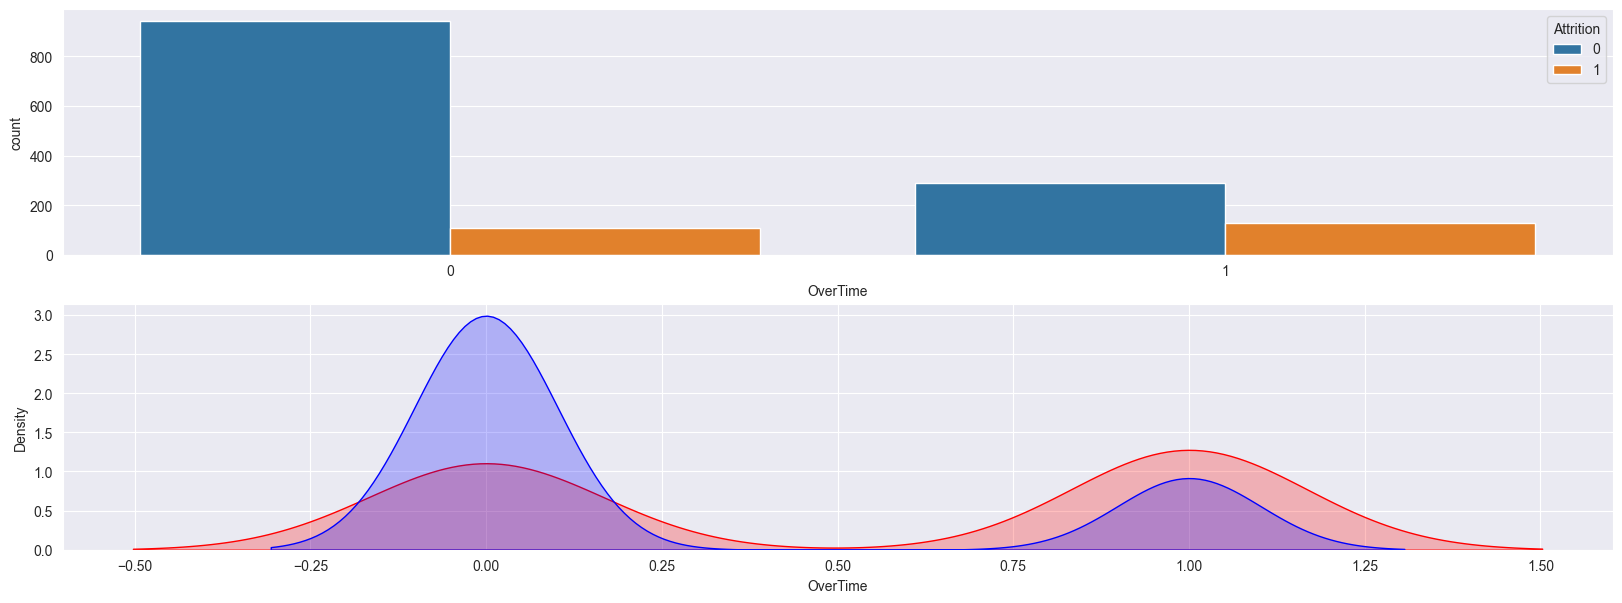

In [625]:
plt.figure(figsize=(20, 30))

# Primeiro subplot: Countplot
plt.subplot(811)
sns.countplot(x='OverTime', hue='Attrition', data=employee_df)  # Usando 'Gender' como hue

# Segundo subplot: KDE plot
plt.subplot(812)
sns.kdeplot(left_df['OverTime'], label='Funcionários que saíram', fill=True, color='r')
sns.kdeplot(stayed_df['OverTime'], label='Funcionários que ficaram', fill=True, color='b')

<Axes: xlabel='MaritalStatus_Single', ylabel='Density'>

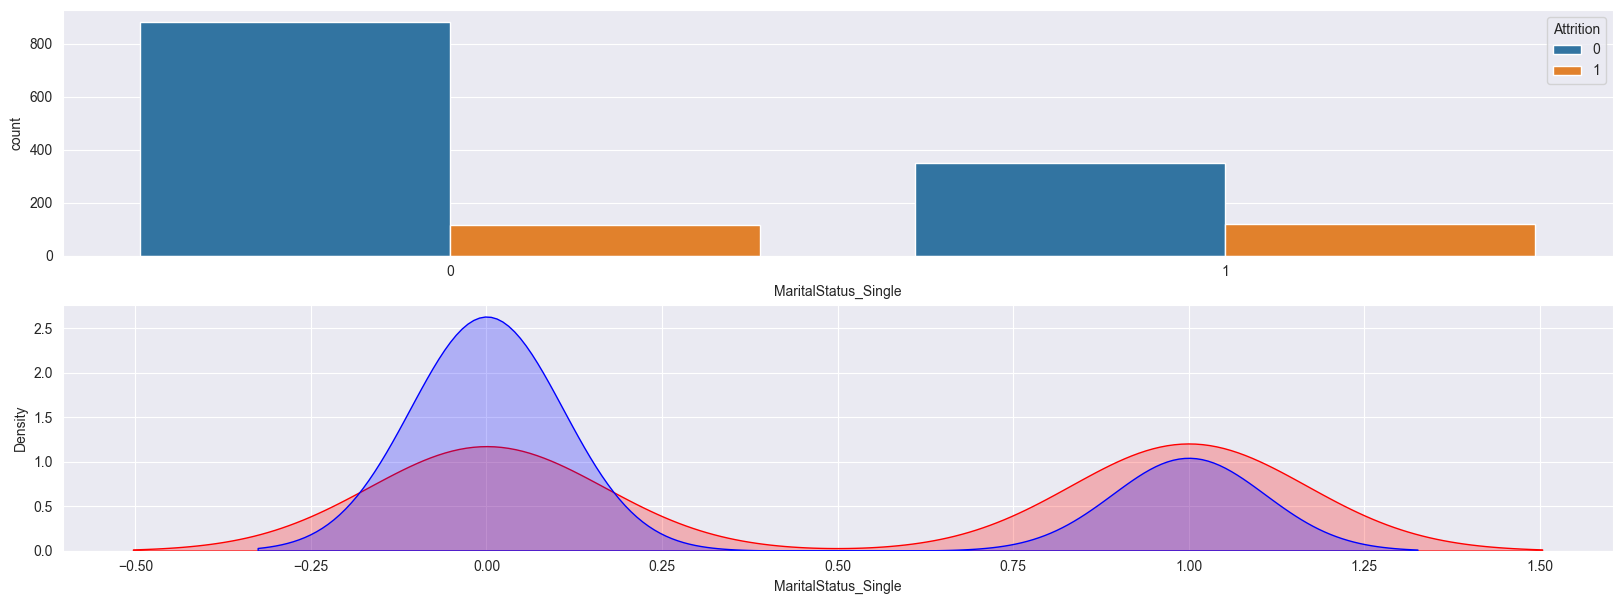

In [626]:
plt.figure(figsize=(20, 30))

plt.subplot(811)
sns.countplot(x='MaritalStatus_Single', hue='Attrition', data=employee_df)

plt.subplot(812)
sns.kdeplot(left_df['MaritalStatus_Single'], label = 'Funcionários que saíram', fill=True, color='r')
sns.kdeplot(stayed_df['MaritalStatus_Single'], label = 'Funcionários que ficaram', fill=True, color='b')

<Axes: xlabel='TotalWorkingYears', ylabel='Density'>

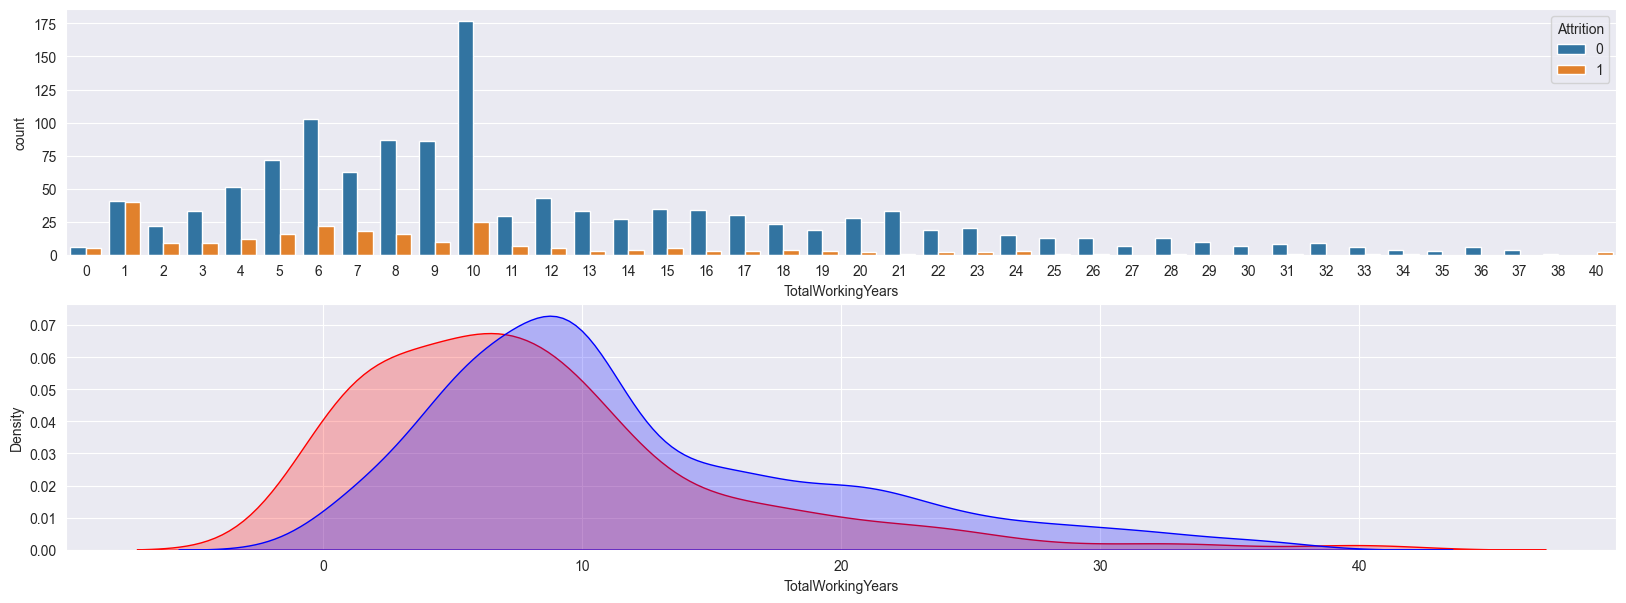

In [627]:
plt.figure(figsize=(20, 30))

plt.subplot(811)
sns.countplot(x='TotalWorkingYears', hue='Attrition', data=employee_df)

plt.subplot(812)
sns.kdeplot(left_df['TotalWorkingYears'], label = 'Funcionários que saíram', fill=True, color='r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Funcionários que ficaram', fill=True, color='b')

<Axes: xlabel='JobLevel', ylabel='Density'>

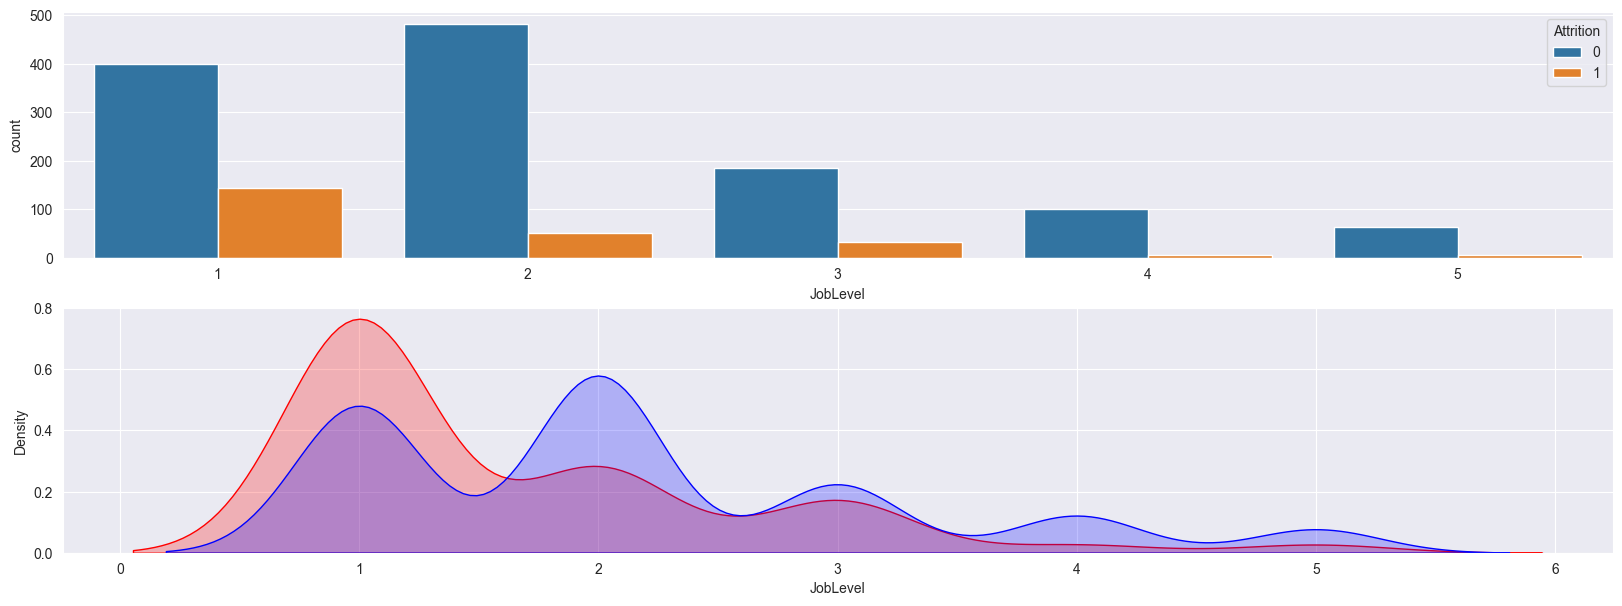

In [628]:
"""JobLevel"""
plt.figure(figsize=(20, 30))

plt.subplot(811)
sns.countplot(x = 'JobLevel', hue='Attrition', data=employee_df)

plt.subplot(812)
sns.kdeplot(left_df['JobLevel'], label = 'Funcionários que saíram', fill=True, color='r')
sns.kdeplot(stayed_df['JobLevel'], label = 'Funcionários que ficaram', fill=True, color='b')

<Axes: xlabel='YearsInCurrentRole', ylabel='Density'>

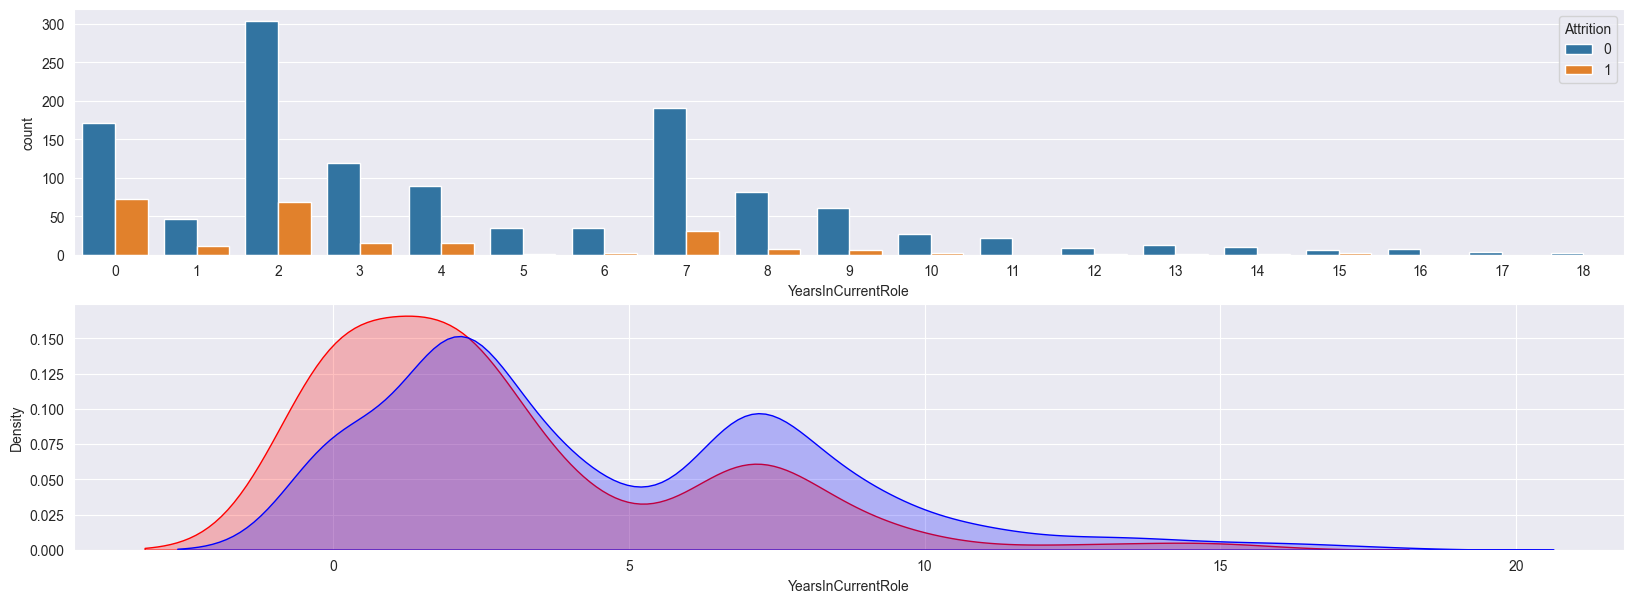

In [629]:


plt.figure(figsize=(20, 30))

plt.subplot(811)
sns.countplot(x = 'YearsInCurrentRole', hue='Attrition', data=employee_df)

plt.subplot(812)
sns.kdeplot(left_df['YearsInCurrentRole'], label = 'Funcionários que saíram', fill=True, color='r')
sns.kdeplot(stayed_df['YearsInCurrentRole'], label = 'Funcionários que ficaram', fill=True, color='b')

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

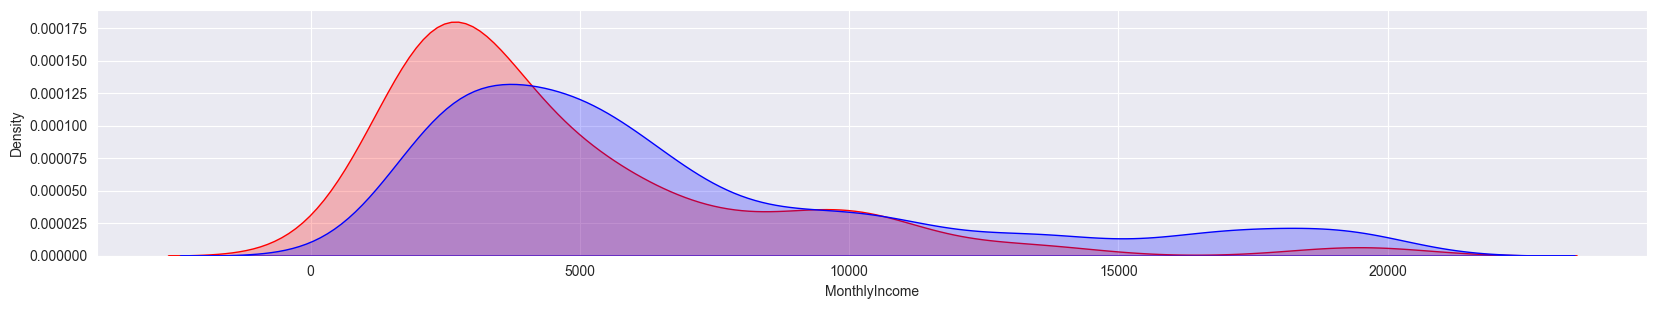

In [630]:
plt.figure(figsize=(20, 30))

plt.subplot(812)
sns.kdeplot(left_df['MonthlyIncome'], label = 'Funcionários que saíram', fill=True, color='r')
sns.kdeplot(stayed_df['MonthlyIncome'], label = 'Funcionários que ficaram', fill=True, color='b')

<Axes: xlabel='Age', ylabel='Density'>

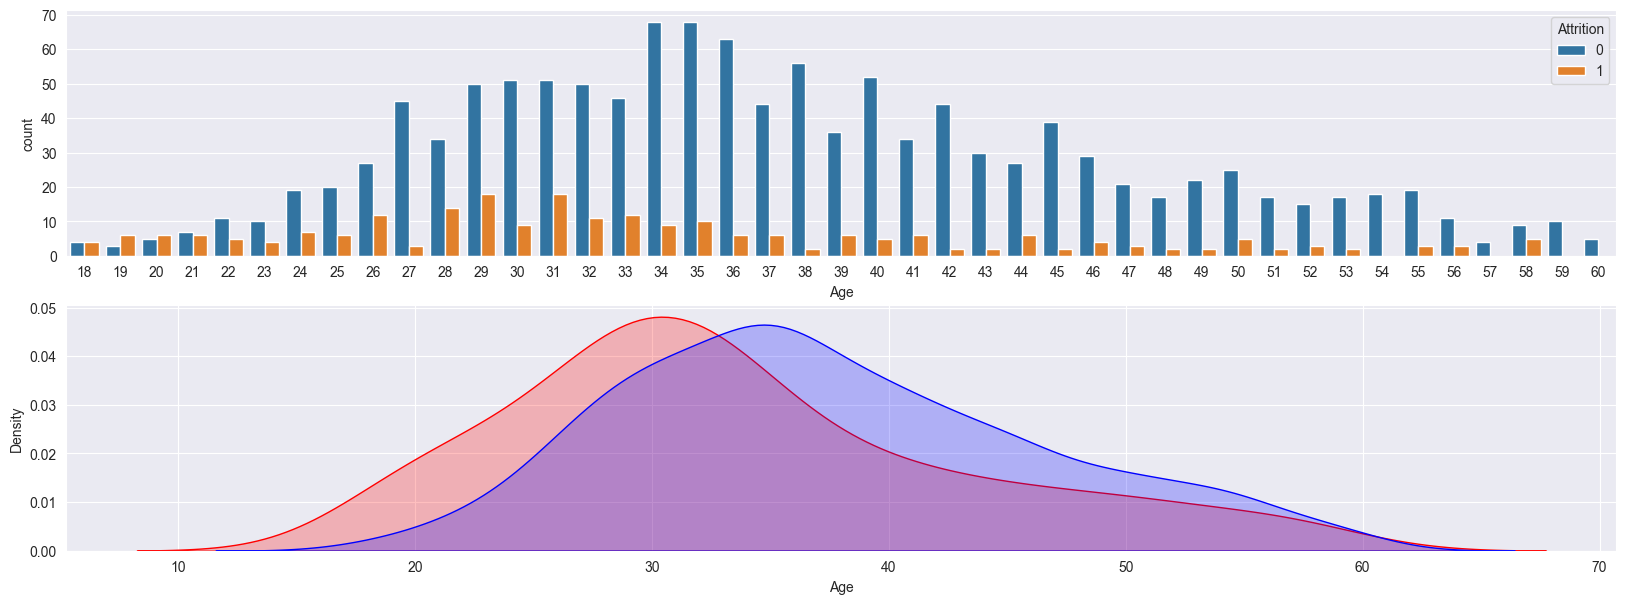

In [631]:


plt.figure(figsize=(20, 30))

plt.subplot(811)
sns.countplot(x = 'Age', hue='Attrition', data=employee_df)

plt.subplot(812)
sns.kdeplot(left_df['Age'], label = 'Funcionários que saíram', fill=True, color='r')
sns.kdeplot(stayed_df['Age'], label = 'Funcionários que ficaram', fill=True, color='b')

<Axes: xlabel='JobRole_Sales Representative', ylabel='Density'>

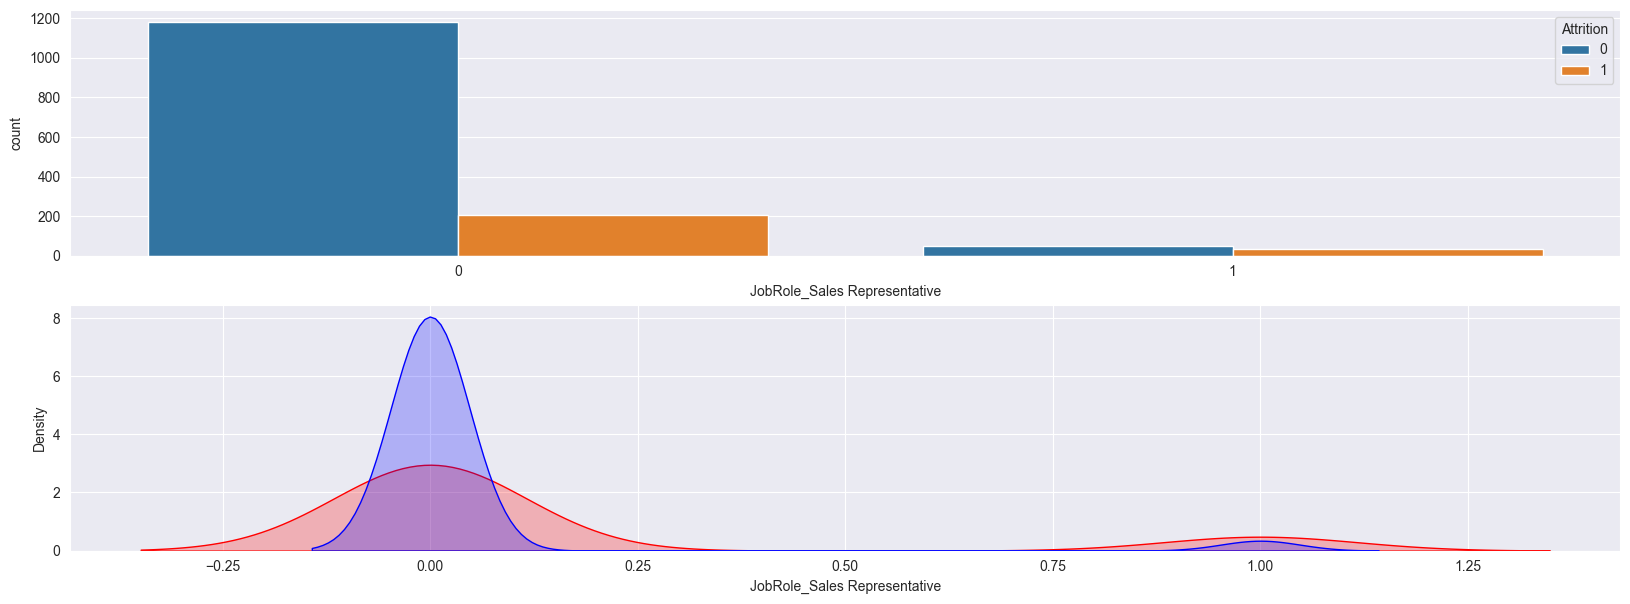

In [632]:


plt.figure(figsize=(20, 30))

plt.subplot(811)
sns.countplot(x = 'JobRole_Sales Representative', hue='Attrition', data=employee_df)

plt.subplot(812)
sns.kdeplot(left_df['JobRole_Sales Representative'], label = 'Funcionários que saíram', fill=True, color='r')
sns.kdeplot(stayed_df['JobRole_Sales Representative'], label = 'Funcionários que ficaram', fill=True, color='b')

<Axes: xlabel='YearsWithCurrManager', ylabel='Density'>

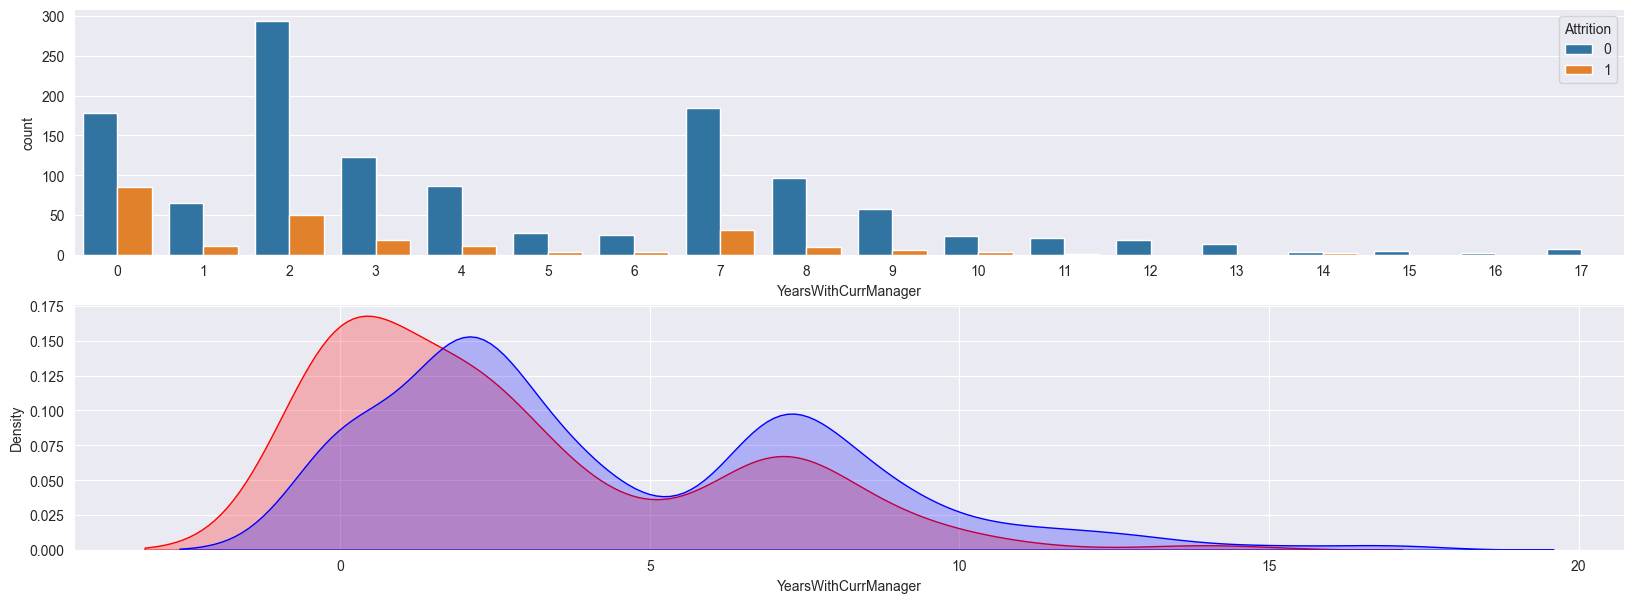

In [633]:

plt.figure(figsize=(20, 30))

plt.subplot(811)
sns.countplot(x = 'YearsWithCurrManager', hue='Attrition', data=employee_df)

plt.subplot(812)
sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Funcionários que saíram', fill=True, color='r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Funcionários que ficaram', fill=True, color='b')

<Axes: xlabel='StockOptionLevel', ylabel='Density'>

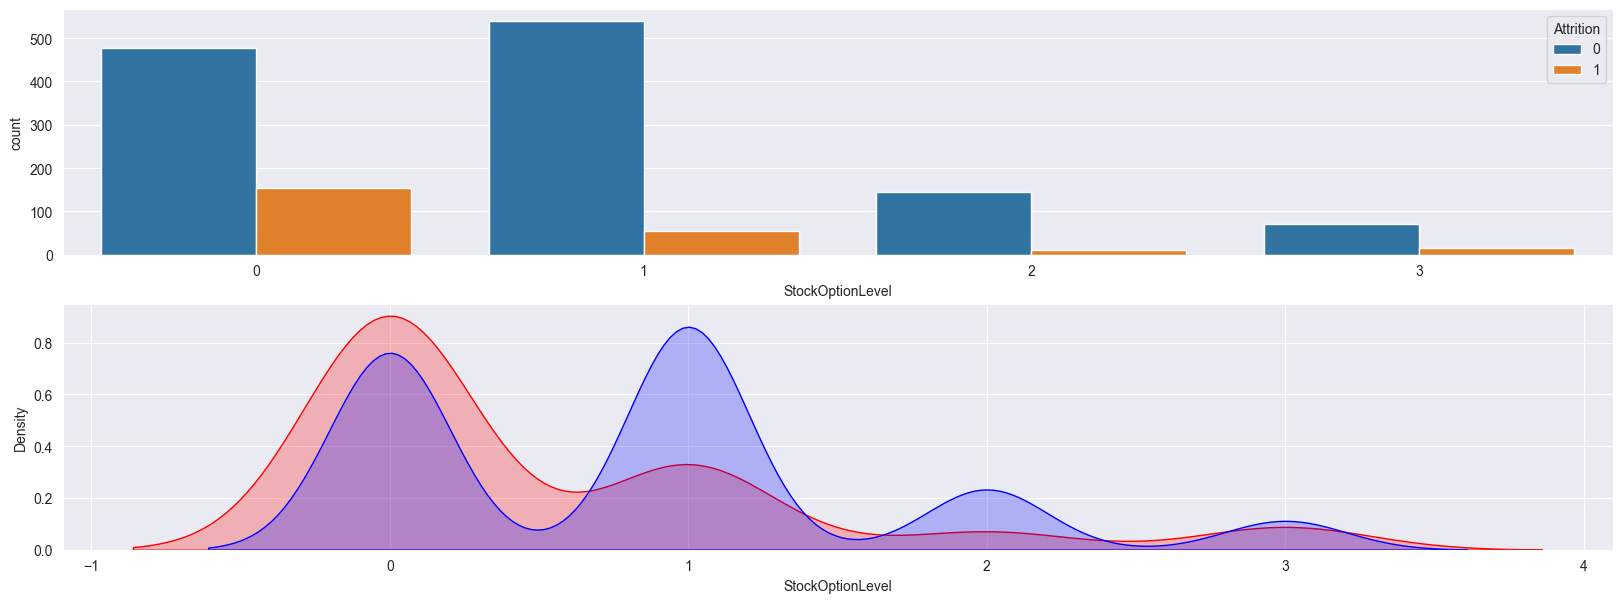

In [634]:

plt.figure(figsize=(20, 30))

plt.subplot(811)
sns.countplot(x = 'StockOptionLevel', hue='Attrition', data=employee_df)

plt.subplot(812)
sns.kdeplot(left_df['StockOptionLevel'], label = 'Funcionários que saíram', fill=True, color='r')
sns.kdeplot(stayed_df['StockOptionLevel'], label = 'Funcionários que ficaram', fill=True, color='b')

<Axes: xlabel='YearsAtCompany', ylabel='Density'>

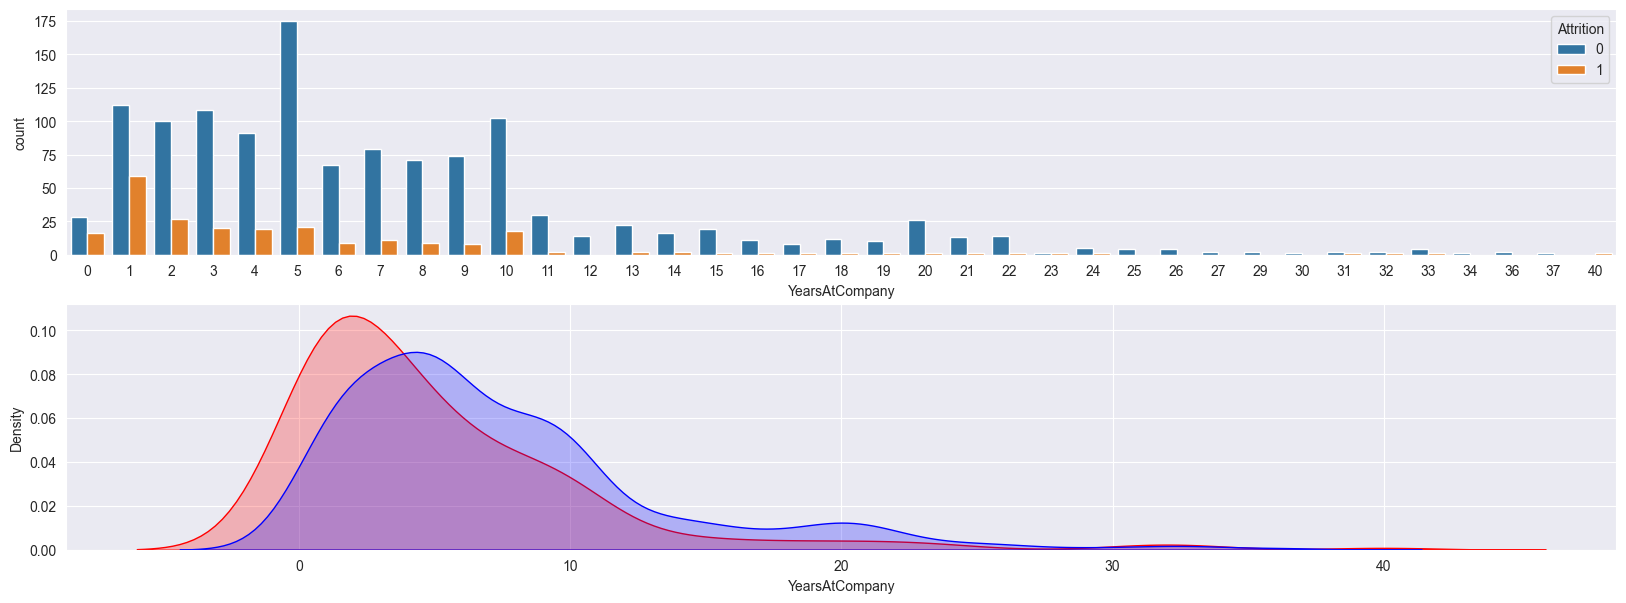

In [635]:

plt.figure(figsize=(20, 30))

plt.subplot(811)
sns.countplot(x = 'YearsAtCompany', hue='Attrition', data=employee_df)

plt.subplot(812)
sns.kdeplot(left_df['YearsAtCompany'], label = 'Funcionários que saíram', fill=True, color='r')
sns.kdeplot(stayed_df['YearsAtCompany'], label = 'Funcionários que ficaram', fill=True, color='b')

<Axes: xlabel='JobInvolvement', ylabel='Density'>

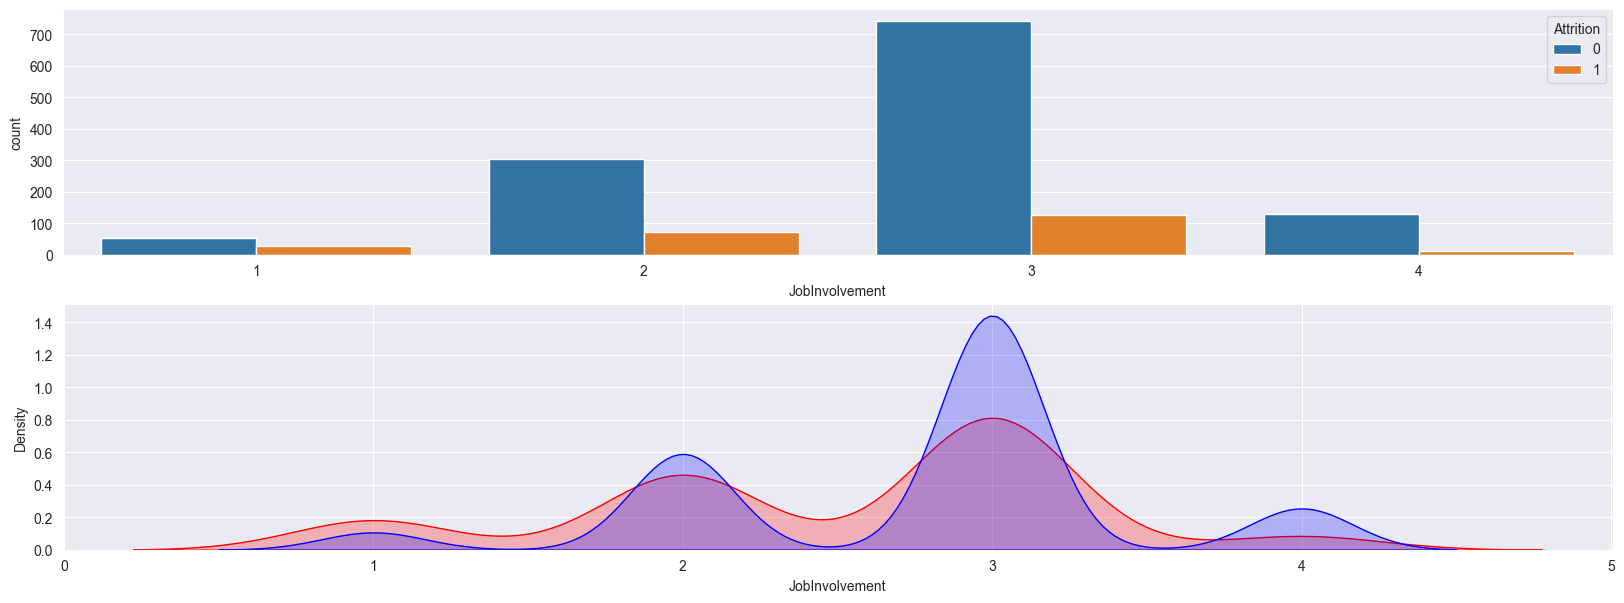

In [636]:


plt.figure(figsize=(20, 30))

plt.subplot(811)
sns.countplot(x = 'JobInvolvement', hue='Attrition', data=employee_df)

plt.subplot(812)
sns.kdeplot(left_df['JobInvolvement'], label = 'Funcionários que saíram', fill=True, color='r')
sns.kdeplot(stayed_df['JobInvolvement'], label = 'Funcionários que ficaram', fill=True, color='b')

<Axes: xlabel='BusinessTravel_Travel_Frequently', ylabel='Density'>

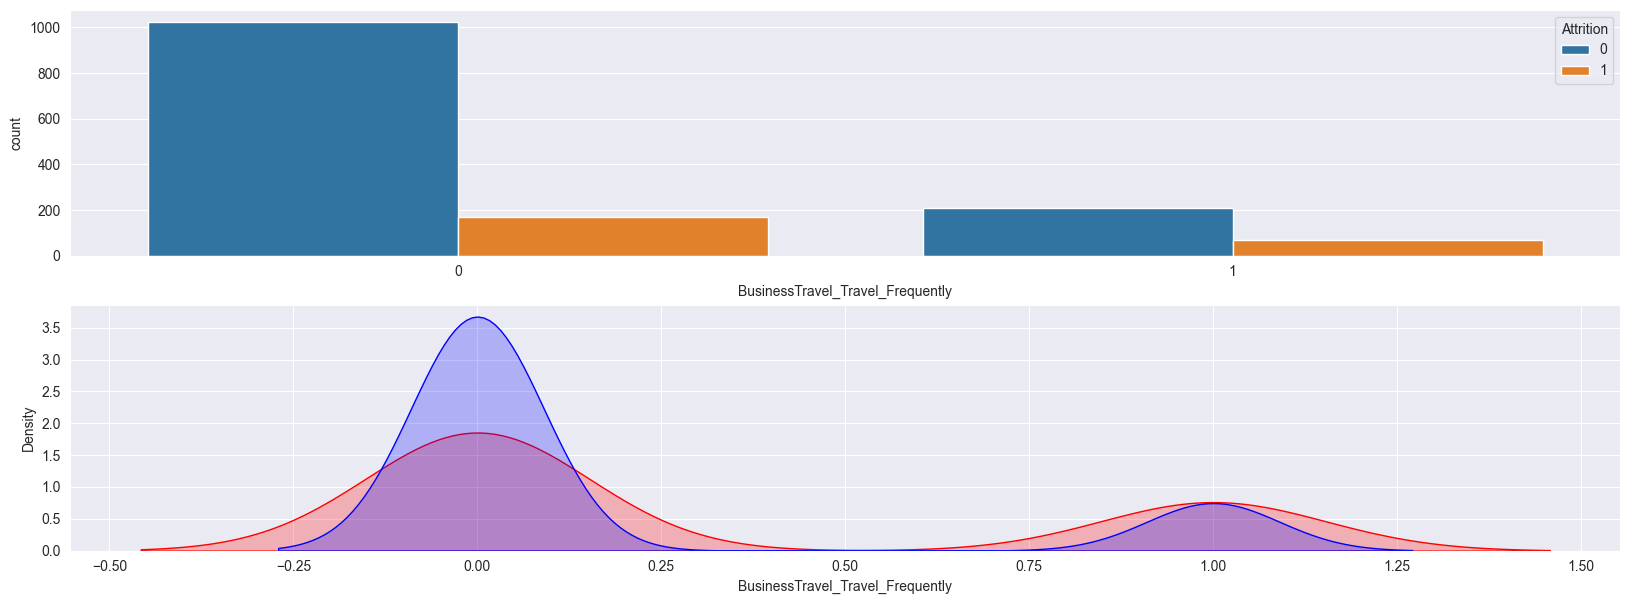

In [637]:


plt.figure(figsize=(20, 30))

plt.subplot(811)
sns.countplot(x = 'BusinessTravel_Travel_Frequently', hue='Attrition', data=employee_df)

plt.subplot(812)
sns.kdeplot(left_df['BusinessTravel_Travel_Frequently'], label = 'Funcionários que saíram', fill=True, color='r')
sns.kdeplot(stayed_df['BusinessTravel_Travel_Frequently'], label = 'Funcionários que ficaram', fill=True, color='b')

<Axes: xlabel='JobSatisfaction', ylabel='Density'>

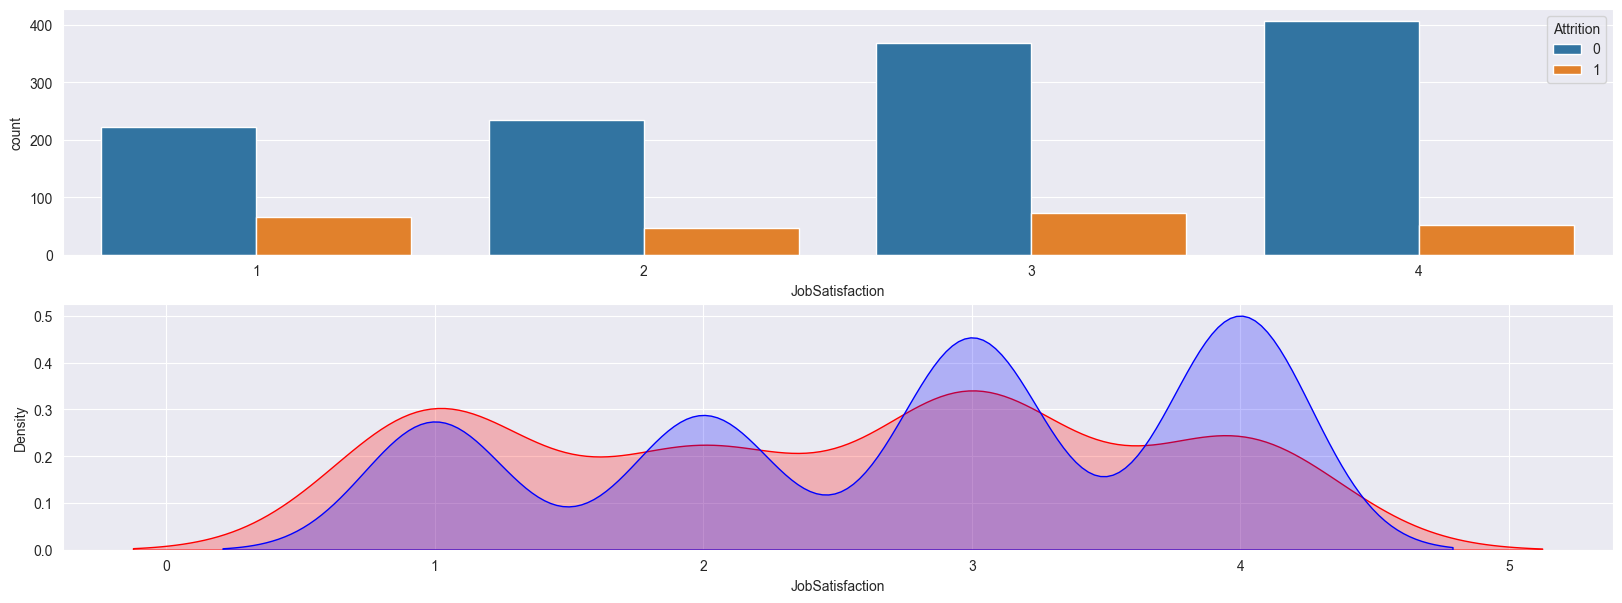

In [638]:


plt.figure(figsize=(20, 30))

plt.subplot(811)
sns.countplot(x = 'JobSatisfaction', hue='Attrition', data=employee_df)

plt.subplot(812)
sns.kdeplot(left_df['JobSatisfaction'], label = 'Funcionários que saíram', fill=True, color='r')
sns.kdeplot(stayed_df['JobSatisfaction'], label = 'Funcionários que ficaram', fill=True, color='b')

<Axes: xlabel='EnvironmentSatisfaction', ylabel='Density'>

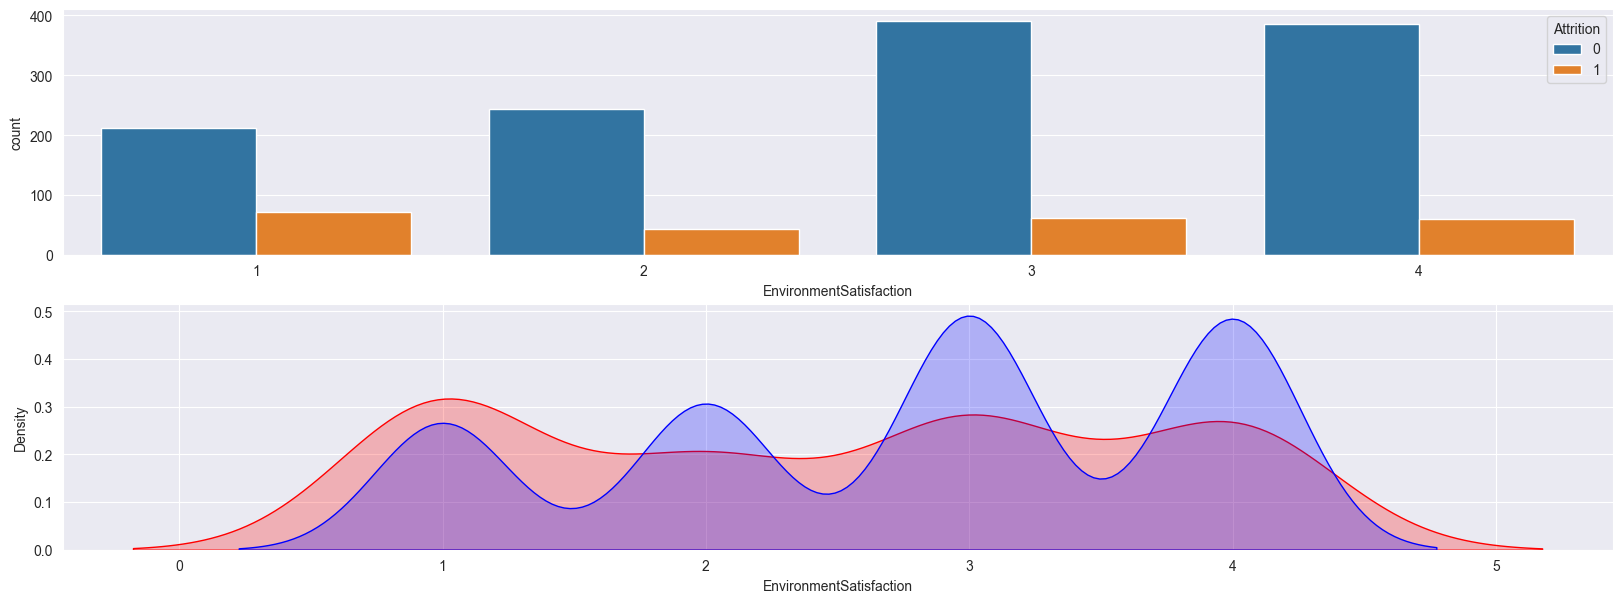

In [639]:


plt.figure(figsize=(20, 30))

plt.subplot(811)
sns.countplot(x = 'EnvironmentSatisfaction', hue='Attrition', data=employee_df)

plt.subplot(812)
sns.kdeplot(left_df['EnvironmentSatisfaction'], label = 'Funcionários que saíram', fill=True, color='r')
sns.kdeplot(stayed_df['EnvironmentSatisfaction'], label = 'Funcionários que ficaram', fill=True, color='b')

### Relatório dos 15 principais atributos analisados

- OverTime: Funcionários que não trabalham horas extras têm menor probabilidade de churn. Isso pode ocorrer porque o excesso de trabalho pode levar à insatisfação e ao esgotamento. Sugestão de melhoria: Implementar políticas que incentivem o equilíbrio entre trabalho e vida pessoal, limitando o número de horas extras e promovendo um ambiente de trabalho saudável.

In [640]:
"""Pré-Processamento e bases de treino/teste"""

employee_df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [641]:
# Hora de separar a coluna alvo (Attrition) e os previsores
# OBS: Usando nomenclatura 'X' para previsores e 'y' para o alvo!

# Previsores
X = employee_df[['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single','Age', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',
       'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',
       'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]

#Coluna Alvo
y = employee_df['Attrition']

In [642]:
# Normalizar dados
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [643]:
# separar em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

### Verificando o tamanho dos conjuntos de treino

In [644]:
X_train.shape, y_train

((1102, 50),
 333     0
 228     0
 108     0
 1050    0
 370     1
        ..
 1269    0
 938     0
 1278    0
 1326    1
 795     0
 Name: Attrition, Length: 1102, dtype: int64)

In [645]:
X_test.shape, y_test

((368, 50),
 119     0
 784     0
 656     1
 1200    0
 1246    1
        ..
 1410    0
 1000    0
 1322    0
 941     0
 93      0
 Name: Attrition, Length: 368, dtype: int64)

In [646]:
"""

# Após carregar o DataFrame
numeric_df = employee_df.drop(columns=['Attrition']).select_dtypes(include=['int64', 'float64'])

# Verificando colunas com desvio padrão zero
zero_std_columns = numeric_df.columns[numeric_df.std() == 0]
print("Colunas com desvio padrão zero (todos os valores iguais):")
print(zero_std_columns.tolist())

# Verificando colunas com NaN
nan_columns = numeric_df.columns[numeric_df.isna().any()]
print("\nColunas com valores NaN:")
print(nan_columns.tolist())

"""

'\n\n# Após carregar o DataFrame\nnumeric_df = employee_df.drop(columns=[\'Attrition\']).select_dtypes(include=[\'int64\', \'float64\'])\n\n# Verificando colunas com desvio padrão zero\nzero_std_columns = numeric_df.columns[numeric_df.std() == 0]\nprint("Colunas com desvio padrão zero (todos os valores iguais):")\nprint(zero_std_columns.tolist())\n\n# Verificando colunas com NaN\nnan_columns = numeric_df.columns[numeric_df.isna().any()]\nprint("\nColunas com valores NaN:")\nprint(nan_columns.tolist())\n\n'

In [647]:
"""Pré-processamento e limpeza de dados"""

employee_df.tail(5)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
1465,36,0,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1469,34,0,628,8,3,2,82,4,2,3,4404,10228,2,0,12,3,1,0,6,3,4,4,3,1,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [648]:
employee_df = pd.read_csv('../data/raw/Human_Resources.csv')
X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]


In [649]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
employee_df = pd.read_csv('../data/raw/Human_Resources.csv')

# Selecionando as colunas categóricas
X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]

# Criar o OneHotEncoder (Sem drop First)
onehotencoder = OneHotEncoder()  # Não vai remover a primeira coluna agora

# Aplicar a transformação e atualizar o X_cat diretamente
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [650]:
print(X_cat)

[[0. 0. 1. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 1. 0.]]


In [651]:
X_cat.shape

(1470, 26)

In [652]:
X_cat = pd.DataFrame(X_cat)

In [653]:
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [654]:
# All Numerical data
employee_df = pd.read_csv('../data/raw/Human_Resources.csv')

X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]

In [655]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)

In [656]:
X_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1102,1,2,2,94,3,2,4,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,279,8,1,3,61,2,2,2,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,1373,2,2,4,92,2,1,3,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,33,1392,3,4,4,56,3,1,3,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,591,2,1,1,40,3,1,2,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,36,884,23,2,3,41,4,2,4,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39,613,6,1,4,42,2,3,1,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,155,4,3,2,87,4,2,2,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,49,1023,2,3,4,63,2,2,2,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8
